In [1]:
import pandas as pd
import numpy as np

names2018 = pd.read_csv('C:/Users/bourb/Downloads/names_by_state/yob2018.txt', names=['name', 'sex', 'births'])

names2018.head(10)

,name,sex,births
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
5,Charlotte,F,12940
6,Mia,F,12642
7,Amelia,F,12301
8,Harper,F,10582
9,Evelyn,F,10376


In [2]:
names2018.groupby('sex').births.sum()

sex
F    1686961
M    1800392
Name: births, dtype: int64

In [3]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'C:/Users/bourb/Downloads/names_by_state/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

names.head()    

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [4]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [5]:
total_births.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


In [6]:
total_births.plot(title='Total Births by sex and year')

In [7]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [8]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [9]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [10]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [11]:
top1000 = top1000.drop(labels='year', axis=1)

In [12]:
boys = top1000[top1000.sex == 'M']

girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF072265C8>,
      dtype=object)

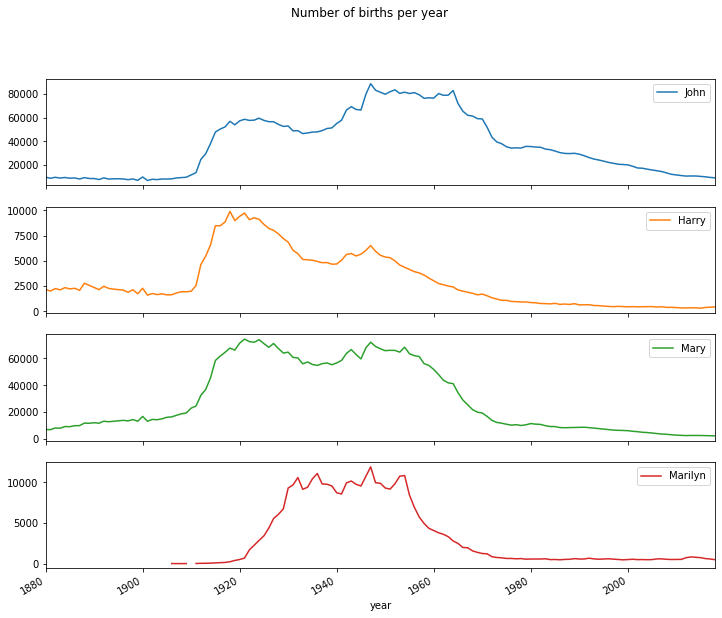

In [13]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")